# Computer Assignment 4

# Machine Learning Introduction

Fateme Zare Karizi
810198550

# Introduction

In this assignment we are about to use Sickit-Learn library to learn Machine Learning. We are given a dataset about diabet and we are going to predict.

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
import math

import matplotlib.pyplot as plt
import seaborn as sns
#import statsmodels.api as sm
import gc
import warnings
warnings.filterwarnings("ignore")

In [6]:
dataset = pd.read_csv('diabetes.csv')

# EDA

In [7]:
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6.0,148.0,72.0,35.0,0.0,33.6,0.627,50.0,1
1,1.0,85.0,66.0,29.0,0.0,26.6,0.351,31.0,0
2,NaN,183.0,64.0,0.0,0.0,23.3,0.672,32.0,1
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0
4,NaN,137.0,40.0,35.0,168.0,NaN,NaN,33.0,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               635 non-null    float64
 1   Glucose                   654 non-null    float64
 2   BloodPressure             680 non-null    float64
 3   SkinThickness             624 non-null    float64
 4   Insulin                   680 non-null    float64
 5   BMI                       684 non-null    float64
 6   DiabetesPedigreeFunction  590 non-null    float64
 7   Age                       655 non-null    float64
 8   Outcome                   768 non-null    int64  
dtypes: float64(8), int64(1)
memory usage: 54.1 KB


In [9]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,635.000000,654.000000,680.000000,624.000000,680.000000,684.000000,590.000000,655.000000,768.000000
mean,3.700787,113.422018,68.786765,20.386218,80.123529,32.083626,0.466676,33.157252,0.348958
std,3.518126,202.816831,19.724841,15.987049,115.681140,7.800741,0.322408,13.829831,0.476951
min,-22.000000,-5000.000000,-2.000000,0.000000,0.000000,0.000000,0.078000,-150.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.375000,0.243250,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,34.000000,32.300000,0.368000,29.000000,0.000000
75%,6.000000,140.750000,80.000000,32.000000,129.250000,36.600000,0.611500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.329000,81.000000,1.000000


missing value percent

In [10]:
missing_data_percent = dataset.isnull().sum() * 100 / len(dataset)
missing_data_percent

Pregnancies                 17.317708
Glucose                     14.843750
BloodPressure               11.458333
SkinThickness               18.750000
Insulin                     11.458333
BMI                         10.937500
DiabetesPedigreeFunction    23.177083
Age                         14.713542
Outcome                      0.000000
dtype: float64

# Handling missing values

There are 2 primary ways of handling missing values: 1.Deleting the Missing values 2.Imputing the Missing Values

Deleting the Missing value:

Generally, this approach is not recommended. It is one of the quick and dirty techniques one can use to deal with missing values. If the missing value is of the type Missing Not At Random (MNAR), then it should not be deleted. If the missing value is of type Missing At Random (MAR) or Missing Completely At Random (MCAR) then it can be deleted. The disadvantage of this method is one might end up deleting some useful data from the dataset. There are 2 ways one can delete the missing values:

1.Deleting the entire row: If a row has many missing values then you can choose to drop the entire row. If every row has some (column) value missing then you might end up deleting the whole data.

2.Deleting the entire column If a certain column has many missing values then you can choose to drop the entire column.


Imputing the Missing Value:

There are different ways of replacing the missing values.

Replacing With Arbitrary Value: If you can make an educated guess about the missing value then you can replace it with some arbitrary value

Replacing With Mean: This is the most common method of imputing missing values of numeric columns. If there are outliers then the mean will not be appropriate. In such cases, outliers need to be treated first.

Replacing With Mode: Mode is the most frequently occurring value. It is used in the case of categorical features.

Replacing With Median: Median is the middlemost value. It’s better to use the median value for imputation in the case of outliers.

Replacing with previous value – Forward fill: In some cases, imputing the values with the previous value instead of mean, mode or median is more appropriate. This is called forward fill. It is mostly used in time series data.

Replacing with next value – Backward fill: In backward fill, the missing value is imputed using the next value.

according to the previous results,DiabetesPedigreeFunction has the most missing values.

we fill missing values with median

In [11]:
dataset['Pregnancies'] = dataset['Pregnancies'].fillna(dataset['Pregnancies'].mean())
dataset['Glucose'] = dataset['Glucose'].fillna(dataset['Glucose'].mean())
dataset['BloodPressure'] = dataset['BloodPressure'].fillna(dataset['BloodPressure'].mean())
dataset['SkinThickness'] = dataset['SkinThickness'].fillna(dataset['SkinThickness'].mean())
dataset['Insulin'] = dataset['Insulin'].fillna(dataset['Insulin'].mean())
dataset['BMI'] = dataset['BMI'].fillna(dataset['BMI'].mean())
dataset['DiabetesPedigreeFunction'] = dataset['DiabetesPedigreeFunction'].fillna(dataset['DiabetesPedigreeFunction'].mean())
dataset['Age'] = dataset['Age'].fillna(dataset['Age'].mean())

In [12]:
dataset.isnull().sum()*100 / len(dataset)

Pregnancies                 0.0
Glucose                     0.0
BloodPressure               0.0
SkinThickness               0.0
Insulin                     0.0
BMI                         0.0
DiabetesPedigreeFunction    0.0
Age                         0.0
Outcome                     0.0
dtype: float64

# Analyse Relation Between Features

to see the dependency between variables we can use the function "information gain"

as we can see Glucose has the most information gain.so it has the highest dependency with our result

Glucose                     0.098317
BMI                         0.062488
Age                         0.041958
Pregnancies                 0.019569
BloodPressure               0.014526
Insulin                     0.010006
SkinThickness               0.000092
DiabetesPedigreeFunction    0.000000
dtype: float64


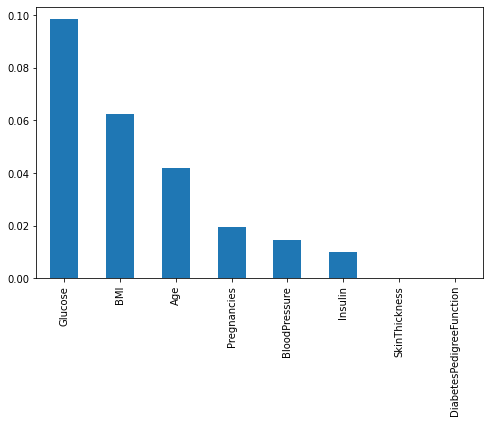

In [13]:
X = dataset.drop(['Outcome'], axis=1, inplace=False)
y = dataset['Outcome']
mutual_info = mutual_info_classif(X, y)
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False).plot.bar(figsize=(8,5))
print(mutual_info.sort_values(ascending=False))

# Normalization VS Standardization

Normalization or Min-Max Scaling

is used to transform features to be on a similar scale. The new point is calculated as: X_new = (X - X_min)/(X_max - X_min) This scales the range to [0, 1]or sometimes [-1, 1]. Geometrically speaking, transformation squishes the n-dimensional data into an n-dimensional unit hypercube. Normalization is useful when there are no outliers as it cannot cope up with them. Usually, we would scale age and not incomes because only a few people have high incomes but the age is close to uniform.
***********************************************************************************
Standardization or Z-Score Normalization

is the transformation of features by subtracting from mean and dividing by standard deviation. This is often called as Z-score. X_new = (X - mean)/Std Standardization can be helpful in cases where the data follows a Gaussian distribution. However, this does not have to be necessarily true. Geometrically speaking, it translates the data to the mean vector of original data to the origin and squishes or expands the points if std is 1 respectively. We can see that we are just changing mean and standard deviation to a standard normal distribution which is still normal thus the shape of the distribution is not affected. Standardization does not get affected by outliers because there is no predefined range of transformed features.

in this project we dont need to use any of this methodes

# How to Work with Categorical Values

Machine learning models require all input and output variables to be numeric and this means that if your data contains categorical data, you must encode it to numbers before you can fit and evaluate a model. The two most popular techniques are:

Ordinal Encoding

The number of possible values is often limited to a fixed set.
Each unique category value is assigned an integer value.
The integer values have a natural ordered relationship between each other and machine learning algorithms may be able to understand and harness this relationship.
********************************
One-Hot Encoding

For categorical variables where no ordinal relationship exists, the integer encoding may not be enough, at best, or misleading to the model at worst.
This is where the integer encoded variable is removed and one new binary variable is added for each unique integer value in the variable.
**********************************
Binary Encoding

Binary encoding is a combination of Hash encoding and one-hot encoding.
Binary encoding works really well when there are a high number of categories.

we can delete some of columns if the information gain of them is very small. for example we can delete the DiabetesPedigreeFunction column because it's information gain is very small.

# Train Test split

You must choose a split percentage that meets your project’s objectives with considerations that include:

1.Computational cost in training the model. 2.Computational cost in evaluating the model. 3.Training set representativeness. 4.Test set representativeness.

Nevertheless, common split percentages include:

Train: 80%, Test: 20%

Train: 67%, Test: 33%

Train: 50%, Test: 50%

I claculate the accuracy for all of them,so I choose 0.2 for test size.

What is the use of random state in train test split? The random state hyperparameter in the train_test_split() function controls the shuffling process. With random_state=None , we get different train and test sets across different executions and the shuffling process is out of control. With random_state=0 , we get the same train and test sets across different executions.

When should you use a 50/50 break to split testing and training sets? If you have enough data, then you can actually go for a 50-50 split but there is no such thing as what would be better, depends completely on the amount of data you have and the complexity of the task you are trying to perform. If you train it on enough data, the size of the test set is of no concern

Stratified Train-Test Splits One final consideration is for classification problems only.

Some classification problems do not have a balanced number of examples for each class label. As such, it is desirable to split the dataset into train and test sets in a way that preserves the same proportions of examples in each class as observed in the original dataset.

This is called a stratified train-test split.

We can achieve this by setting the “stratify” argument to the y component of the original dataset. This will be used by the train_test_split() function to ensure that both the train and test sets have the proportion of examples in each class that is present in the provided “y” array.

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

X, y = dataset.drop(["Outcome"], axis=1), dataset['Outcome']
target = dataset['Outcome']
def calc(ts,df):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=ts)
    clf = DecisionTreeClassifier().fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy for",ts,":",metrics.accuracy_score(y_test, y_pred))
    return 
calc(0.2, dataset)
calc(0.3, dataset)
calc(0.5, dataset)

Accuracy for 0.2 : 0.6688311688311688
Accuracy for 0.3 : 0.6103896103896104
Accuracy for 0.5 : 0.6145833333333334


# Validation set

The validation set is a set of data, separate from the training set, that is used to validate our model performance during training.

This validation process gives information that helps us tune the model’s hyperparameters and configurations accordingly. It is like a critic telling us whether the training is moving in the right direction or not.

The model is trained on the training set, and, simultaneously, the model evaluation is performed on the validation set after every epoch.

The main idea of splitting the dataset into a validation set is to prevent our model from overfitting i.e., the model becomes really good at classifying the samples in the training set but cannot generalize and make accurate classifications on the data it has not seen before. 

# K-Nearest Neighbors

Hyper-Parameters:
    
n_neighbors: Number of neighbors to use by default for kneighbors query

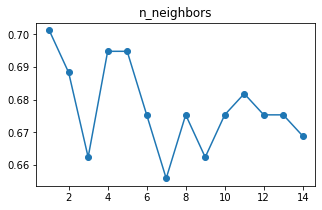

In [15]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


k = [i for i in range(1, 15)]
scores = list()

for i in k:
    clf = KNeighborsClassifier(n_neighbors=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('n_neighbors')
plt.show()

we have the best accuracy when the n_neighbor parameter is 1

Accuracy: 0.7012987012987013


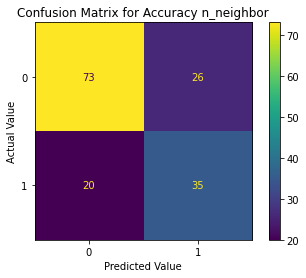

In [16]:
def getconf(neighbor):
    clf =  KNeighborsClassifier(n_neighbors=neighbor).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
    a = confusion_matrix(y_test, y_pred)
    cmd_obj = ConfusionMatrixDisplay(a)
    cmd_obj.plot()
    cmd_obj.ax_.set(
                title='Confusion Matrix for Accuracy n_neighbor', 
                xlabel='Predicted Value', 
                ylabel='Actual Value')
    plt.show()

getconf(1)

# Decision Tree

Hyper-Parameters:

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples

min_samples_leaf:The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression.

min_samples_split:The minimum number of samples that we can specify to term a given node as a leaf node so that we do not want to split it further.

max_features:This type of hyperparameter represents the number of features

random state:

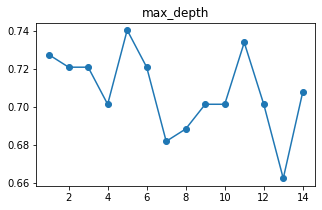

In [17]:
from sklearn.tree import DecisionTreeClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)


k = [i for i in range(1, 15)]
scores = list()

for i in k:
    clf = DecisionTreeClassifier(max_depth=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('max_depth')
plt.show()

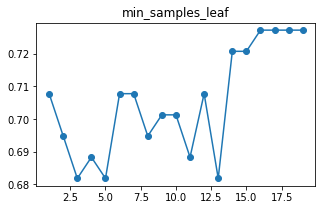

In [18]:
k = [i for i in range(1, 20)]
scores = list()

for i in k:
    clf = DecisionTreeClassifier(min_samples_leaf=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('min_samples_leaf')
plt.show()

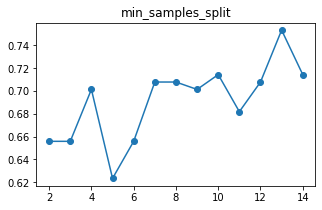

In [19]:
k = [i for i in range(2, 15)]
scores = list()

for i in k:
    clf = DecisionTreeClassifier(min_samples_split=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('min_samples_split')
plt.show()

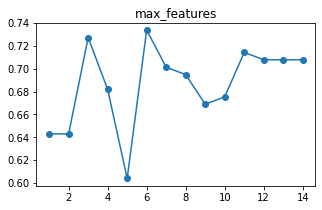

In [20]:
k = [i for i in range(1, 15)]
scores = list()

for i in k:
    clf = DecisionTreeClassifier(max_features=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('max_features')
plt.show()

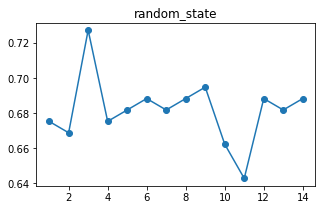

In [21]:
k = [i for i in range(1, 15)]
scores = list()

for i in k:
    clf = DecisionTreeClassifier(random_state=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('random_state')
plt.show()

Accuracy: 0.6753246753246753


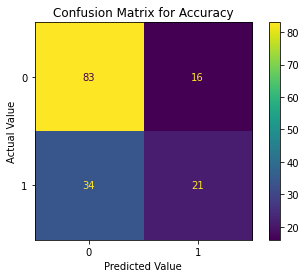

In [26]:
clf =  DecisionTreeClassifier(min_samples_leaf=17,max_depth=5,min_samples_split=5,max_features=3,random_state=3).fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
a = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(a)
cmd_obj.plot()
cmd_obj.ax_.set(
            title='Confusion Matrix for Accuracy', 
            xlabel='Predicted Value', 
            ylabel='Actual Value')
plt.show()

# Logistic Regression

Hyper-Parameters:

Solver:is the algorithm you use to solve the optimization problem in minimizing the error. Sklearn offers us the following options to choose: {‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’.

lbfgs is an overall best performer compared to other methods and is memory efficient. You may encounter convergence issues though.
sag is aimed to tackle large datasets, such as a large number of rows or features.
saga is also suitable for very large datasets, you can choose this solver for sparse multinomial logistic regression.
newton-cg calculates Hessian matrix and is computationally expensive in high dimensions
liblinear is suitable for solving large-scale classification problems.

Penalty: prevents your model from overfitting and becoming too complex. Sklearn provides us the following choices: {‘l1’, ‘l2’, ‘elasticnet’, ‘none’}, default=’l2’. You can see what penalties are supported by each solver.

C : is set along with the penalty and also helps to prevent overfitting. Remember, C should be a positive value, and the smaller the values you specify the stronger regularization will be.

You will find other parameters like class_weight, max_iter, and so on. They help you in handling specific issues. E.g., class_weight is helpful in imbalanced datasets where you can put more emphasis for a particular class, or max_iter can help you to fix a conversion issue

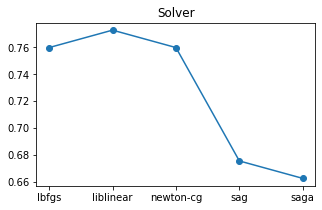

In [23]:
 from sklearn.linear_model import LogisticRegression 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
scores = list()

def calc_logistic (solver_):
    clf = LogisticRegression(solver=solver_).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    return acc

k = ['lbfgs','liblinear','newton-cg','sag','saga']

for i in k:
    scores.append(calc_logistic(i))

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('Solver')
plt.show()

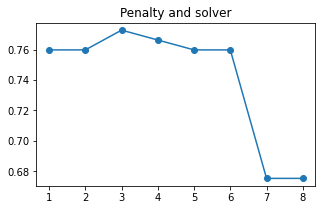

In [24]:
scores = list()

def calc_logistic (s,p):
    clf = LogisticRegression(solver=s,penalty=p).fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

calc_logistic('lbfgs','l2')
calc_logistic('lbfgs','none')
#calc_logistic('saga','elasticnet')
calc_logistic('liblinear','l2')
calc_logistic('liblinear','l1')
calc_logistic('newton-cg','l2')
calc_logistic('newton-cg','none')
calc_logistic('sag','l2')
calc_logistic('sag','none')

k = [i for i in range(1, 9)]

plt.figure(figsize=(5,3))
plt.plot(k, scores, '-o')
plt.title('Penalty and solver')
plt.show()

Accuracy: 0.7727272727272727


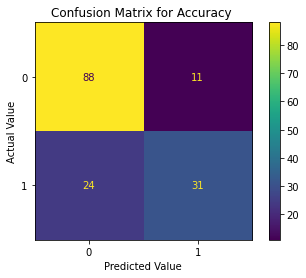

In [25]:
clf =  LogisticRegression(solver='liblinear',penalty='l2').fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
a = confusion_matrix(y_test, y_pred)
cmd_obj = ConfusionMatrixDisplay(a)
cmd_obj.plot()
cmd_obj.ax_.set(
            title='Confusion Matrix for Accuracy ', 
            xlabel='Predicted Value', 
            ylabel='Actual Value')
plt.show()

# Underfitting:

A statistical model or a machine learning algorithm is said to have underfitting when it cannot capture the underlying trend of the data. (It’s just like trying to fit undersized pants!) Underfitting destroys the accuracy of our machine learning model. Its occurrence simply means that our model or the algorithm does not fit the data well enough. It usually happens when we have fewer data to build an accurate model and also when we try to build a linear model with fewer non-linear data. In such cases, the rules of the machine learning model are too easy and flexible to be applied on such minimal data and therefore the model will probably make a lot of wrong predictions. Underfitting can be avoided by using more data and also reducing the features by feature selection.

Techniques to reduce underfitting:

1-Increase model complexity 2-Increase the number of features, performing feature engineering 3-Remove noise from the data. 4-Increase the number of epochs or increase the duration of training to get better results.

# Overfitting:

A statistical model is said to be overfitted when we train it with a lot of data (just like fitting ourselves in oversized pants!). When a model gets trained with so much data, it starts learning from the noise and inaccurate data entries in our data set. Then the model does not categorize the data correctly, because of too many details and noise. The causes of overfitting are the non-parametric and non-linear methods because these types of machine learning algorithms have more freedom in building the model based on the dataset and therefore they can really build unrealistic models. A solution to avoid overfitting is using a linear algorithm if we have linear data or using the parameters like the maximal depth if we are using decision trees.

Techniques to reduce overfitting:

1-Increase training data. 2-Reduce model complexity. 3-Early stopping during the training phase (have an eye over the loss over the training period as soon as loss begins to increase stop training). 4-Ridge Regularization and Lasso Regularization 5-Use dropout for neural networks to tackle overfitting.

# Grid Search

I'v just test all the parameters for all models so I dont need to use Grid Search. because it finds best params for each model

# Ensemble Methods

In [27]:
from sklearn.ensemble import RandomForestClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
clf = RandomForestClassifier().fit(X_train,y_train)
y_pred = clf.predict(X_test)
print('accuracy =',metrics.accuracy_score(y_test, y_pred))

accuracy = 0.7532467532467533


n_estimators: The number of trees in the forest

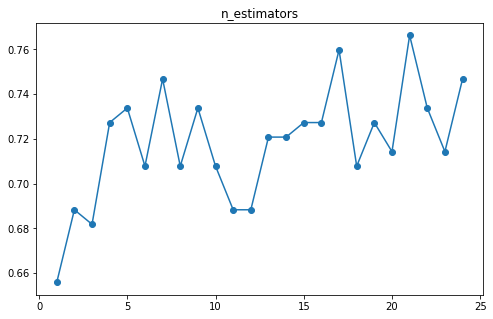

In [34]:
k = [i for i in range(1, 25)]
scores = list()

for i in k:
    clf = RandomForestClassifier(n_estimators=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k, scores, '-o')
plt.title('n_estimators')
plt.show()

max_depth: The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split sample

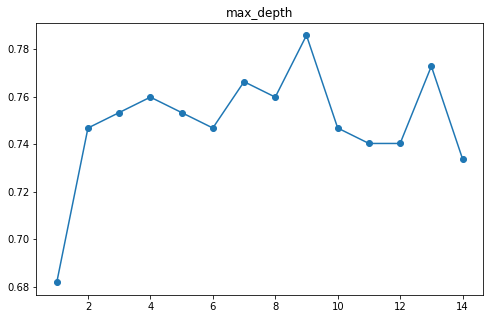

In [29]:
k = [i for i in range(1, 15)]
scores = list()

for i in k:
    clf = RandomForestClassifier(max_depth=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k, scores, '-o')
plt.title('max_depth')
plt.show()

min_samples_leaf:The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches. This may have the effect of smoothing the model, especially in regression

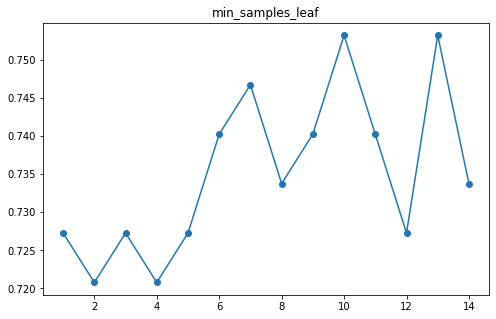

In [33]:
k = [i for i in range(1, 15)]
scores = list()

for i in k:
    clf = RandomForestClassifier(min_samples_leaf=i).fit(X_train,y_train)
    y_pred = clf.predict(X_test)

    acc = metrics.accuracy_score(y_test, y_pred)
    scores.append(acc)

plt.figure(figsize=(8,5))
plt.plot(k, scores, '-o')
plt.title('min_samples_leaf')
plt.show()

# What is Bias?

To make predictions, our model will analyze our data and find patterns in it. Using these patterns, we can make generalizations about certain instances in our data. Our model after training learns these patterns and applies them to the test set to predict them. 

Bias is the difference between our actual and predicted values. Bias is the simple assumptions that our model makes about our data to be able to predict new data.
              
When the Bias is high, assumptions made by our model are too basic, the model can’t capture the important features of our data. This means that our model hasn’t captured patterns in the training data and hence cannot perform well on the testing data too. If this is the case, our model cannot perform on new data and cannot be sent into production. 

This instance, where the model cannot find patterns in our training set and hence fails for both seen and unseen data, is called Underfitting. 

# What is Variance?

Variance is the very opposite of Bias. During training, it allows our model to ‘see’ the data a certain number of times to find patterns in it. If it does not work on the data for long enough, it will not find patterns and bias occurs. On the other hand, if our model is allowed to view the data too many times, it will learn very well for only that data. It will capture most patterns in the data,  but it will also learn from the unnecessary data present, or from the noise.

We can define variance as the model’s sensitivity to fluctuations in the data. Our model may learn from noise. This will cause our model to consider trivial features as important. 

Hence, our model will perform really well on testing data and get high accuracy but will fail to perform on new, unseen data. New data may not have the exact same features and the model won’t be able to predict it very well. This is called Overfitting.